In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

alphas = np.linspace(0,0.1,num=21)
scales = np.linspace(2.5,4.0,num=21)

trainss = []
testss = []

for alpha in alphas:
    trains = []
    tests = []
    for scale in scales:
        train = np.loadtxt("./arithmetic_landscape_fine_45/trainbest_alpha_%.3f_scale_%.3f"%(alpha, scale))
        test = np.loadtxt("./arithmetic_landscape_fine_45/testbest_alpha_%.3f_scale_%.3f"%(alpha, scale))
        trains.append(train)
        tests.append(test)
    trainss.append(trains)
    testss.append(tests)


/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


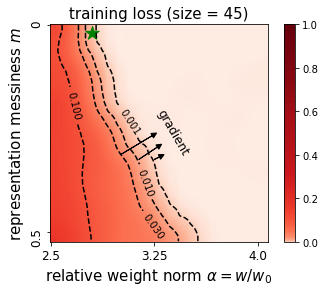

In [2]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors

#plt.figure(figsize=(20,10))

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**(1/4)
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0, vmax=1.0)

plot_scale = ps = 10

blur = gaussian_filter(np.array(trainss)[:,:], sigma=1)
large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
plt.imshow(large, cmap='Reds', norm=norm)
plt.colorbar()


plt.xlabel('relative weight norm '+r"$\alpha=w/w_0$",fontsize=15)
plt.ylabel('representation messiness '+r"$m$", fontsize=15)
plt.xticks([0,10*plot_scale,20*plot_scale],[scales[0], scales[10], scales[20]], fontsize=12)
plt.yticks([0,20*plot_scale],[0,0.5], rotation=90, fontsize=12)

x = np.arange(21*plot_scale)
y = np.arange(21*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, large, [0.001, 0.01, 0.03,0.1], colors=["black"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)

plt.title("training loss (size = 45)", fontsize=15)

plt.arrow(10*ps, 13*ps, 0.5*ps,-0.25*ps, head_width=5, head_length=5, color="black")
plt.arrow(8.5*ps, 13*ps, 1.8*ps,-1.2*ps, head_width=5, head_length=5, color="black")
plt.arrow(6.8*ps, 12.5*ps, 3*ps,-1.8*ps, head_width=5, head_length=5, color="black")
plt.scatter(4*ps,0.8*ps,s=200,marker="*",color="green")

plt.text(10*ps,12.5*ps, "gradient", fontsize=12, rotation=-60)
plt.savefig("./plots/arithmetic_45_contour.pdf", bbox_inches="tight")

In [11]:
np.array(trainsss[0]).shape

(105, 21)

/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


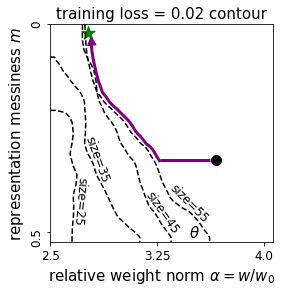

In [13]:
plt.figure(figsize=(4,4))

trainsss = []
sizes = [25,35,45,55]

for size in sizes:
    trainss = []
    for alpha in alphas:
        trains = []
        for scale in scales:
            train = np.loadtxt("./arithmetic_landscape_fine_%d/trainbest_alpha_%.3f_scale_%.3f"%(size, alpha, scale))
            trains.append(train)
        trainss.append(trains)
    trainsss.append(trainss)

for ii in range(4):
    trainss = trainsss[ii]

    class MyNormalize(mcolors.Normalize):
        def __call__(self, value, clip=None):
            # function to normalize any input between vmin and vmax linearly to [0,1]
            n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
            # nonlinear function between [0,1] and [0,1]
            f = lambda x: x**(1/4)
            return np.ma.masked_array(f(n(value)))

    norm=  MyNormalize(vmin=0, vmax=1.0)

    plot_scale = ps = 10

    blur = gaussian_filter(np.array(trainss)[:,:], sigma=1)
    large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
    #plt.imshow(large, cmap='Reds', norm=norm)
    #plt.colorbar()


    plt.xlabel('relative weight norm '+r"$\alpha=w/w_0$",fontsize=15)
    plt.ylabel('representation messiness '+r"$m$", fontsize=15)
    plt.xticks([0,10*plot_scale,20*plot_scale],[scales[0], scales[10], scales[20]], fontsize=12)
    plt.yticks([0,20*plot_scale],[0,0.5], rotation=90, fontsize=12)

    x = np.arange(21*plot_scale)
    y = np.arange(21*plot_scale)
    X, Y = np.meshgrid(x, y)
    #fig, ax = plt.subplots()
    CS = plt.gca().contour(X, Y, large, [0.02], colors=["black"], linestyles=["dashed", "dashed"])
    #plt.gca().clabel(CS, inline=True, fontsize=10)

    plt.title("training loss = 0.02 contour", fontsize=15)
plt.gca().invert_yaxis()

plt.scatter(3.5*ps,0.8*ps,s=200,marker="*",color="green")

plt.text(11*ps,19*ps,"size=55", rotation=-45, fontsize=12)
plt.text(8.7*ps,20*ps,"size=45", rotation=-55, fontsize=12)
plt.text(3*ps,15*ps,"size=35", rotation=-70, fontsize=12)
plt.text(2.*ps,19*ps,"size=25", rotation=-95, fontsize=12)
#plt.text(8.7*ps,20*ps,"size=45", rotation=-55, fontsize=12)

plt.arrow(15*ps, 13*ps, -4.7*ps, 0*ps,head_width=0, head_length=0, lw=3, color="purple")
plt.scatter(15.5*ps, 13*ps, s=100, color="black")
plt.arrow(4*ps, 3*ps, -0.1*ps,-1*ps, head_width=8, head_length=8, color="purple")

for item in CS.collections:
   for i in item.get_paths():
      v = i.vertices
      x = v[:, 0]
      y = v[:, 1]
      plt.plot(x[20:-130]+0.5*ps,y[20:-130], lw=3, color="purple")
    
plt.text(13*ps,20.5*ps,r"$\theta$", fontsize=15)

plt.savefig("./plots/arithmetic_data_dependence.pdf", bbox_inches="tight")

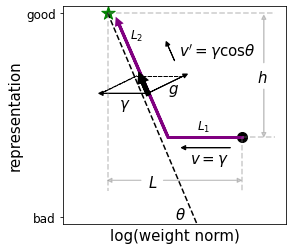

In [316]:
plt.figure(figsize=(4,4))

plt.xlim(0,1)
plt.ylim(0,1)

plt.scatter(0.2,0.97,s=200,marker="*", color="green")
plt.plot([0.2,0.6],[0.97,0.0], color="black", ls="--")
plt.text(0.5,0.02,r"$\theta$", fontsize=15)
plt.scatter(0.8,0.4,s=100, color="black")
plt.plot([0.8,0.47],[0.4,0.4], color="purple", lw=3)
plt.arrow(0.47,0.4,-0.22,0.52, head_width=0.02, head_length=0.02, color="purple", lw=3)

plt.arrow(0.75,0.35,-0.2,0.0, color="black",head_width=0.02, head_length=0.02)
plt.text(0.57,0.28,r"$v=\gamma$", fontsize=15)

plt.arrow(0.38,0.6,-0.2,0.0, color="black",head_width=0.02, head_length=0.02)
plt.arrow(0.38,0.6,0.16,0.08, color="black",head_width=0.02, head_length=0.02)

plt.arrow(0.17,0.6,0.16,0.08, color="black",head_width=0.00, head_length=0.00, ls="--")
plt.arrow(0.53,0.68,-0.2,0., color="black",head_width=0.00, head_length=0.00, ls="--")
plt.arrow(0.38,0.6,-0.025,0.06, color="black",head_width=0.02, head_length=0.02,lw=5)

plt.arrow(0.5,0.75,-0.03,0.07, color="black",head_width=0.02, head_length=0.02)
plt.text(0.52,0.77,r"$v'=\gamma{\rm cos}\theta$", fontsize=15)

plt.text(0.47,0.6,r"$g$", fontsize=15)
plt.text(0.25,0.53,r"$\gamma$", fontsize=15)

plt.plot([0.2,0.95],[0.97,0.97],ls="--", color="gray", alpha=0.4)
plt.plot([0.8,0.95],[0.4,0.4],ls="--", color="gray", alpha=0.4)
plt.arrow(0.9,0.74,0.0,0.2,head_width=0.02, head_length=0.02, color="gray", alpha=0.4)
plt.arrow(0.9,0.62,0.0,-0.2,head_width=0.02, head_length=0.02, color="gray", alpha=0.4)
plt.text(0.87,0.65,r"$h$", fontsize=15)


plt.plot([0.2,0.2],[0.97,0.15],ls="--", color="gray", alpha=0.4)
plt.plot([0.8,0.8],[0.4,0.15],ls="--", color="gray", alpha=0.4)
plt.arrow(0.35,0.2,-0.13,0.0,head_width=0.02, head_length=0.02, color="gray", alpha=0.4)
plt.arrow(0.45,0.2,0.33,0.0,head_width=0.02, head_length=0.02, color="gray", alpha=0.4)
plt.text(0.38,0.17,r"$L$", fontsize=15)
plt.text(0.6,0.43,r"$L_1$", fontsize=12)
plt.text(0.3,0.85,r"$L_2$", fontsize=12)

plt.xticks([])
plt.xlabel("log(weight norm)", fontsize=15)

plt.yticks([0.03,0.97],["bad","good"], fontsize=12)
plt.ylabel('representation', fontsize=15)

plt.savefig("./plots/arithmetic_illustration.pdf", bbox_inches="tight")